In [1]:
import scvelo as scv
import scanpy as sc

In [2]:
# 1. Set the drawing style (to make the drawing look better)
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization
# scv.set_figure_params('scvelo', dpi=300, fontsize=10) # High-resolution images for the paper

In [3]:
# 2. Download and load pancreas sample data
# This will automatically download 'endocrinogenesis_day15.h5ad' from the internet to your data/ folder.
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [4]:
# 2. Download and load pancreas sample data
# This will automatically download 'endocrinogenesis_day15.h5ad' from the internet to your data/ folder.
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

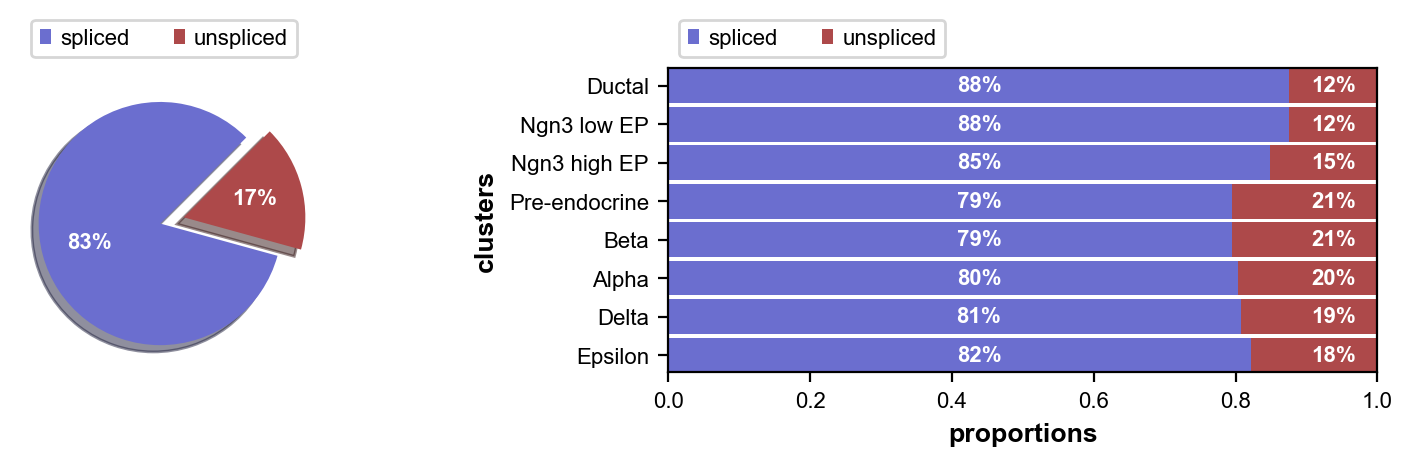

In [5]:
# 3. View the proportions of spliced/unspliced counts
scv.pl.proportions(adata)

In [6]:
# 4. Preprocess the Data
# (1) Filtering and normalization: gene selection, normalizing, logarithmizing X
# (2) Calculate the first and second order moments (means and uncentered variances) computed among nearest neighbors in PCA space

scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

# Check the remaining number of genes
print(adata.n_vars)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/var/folders/hc/vh9fj9s97ds8lwjpw_6l74p80000gn/T/ipykernel_96366/4047783222.py:6: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
2000


In [7]:
# 5. Estimate RNA velocity，mode='deterministic' (default，stochastical)
scv.tl.velocity(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


In [8]:
# 6. Estimate the transition probabilities of cell-to-cell transitions, using cosine correlation between the potential cell-to-cell transitions and the velocity vector.
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/10 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

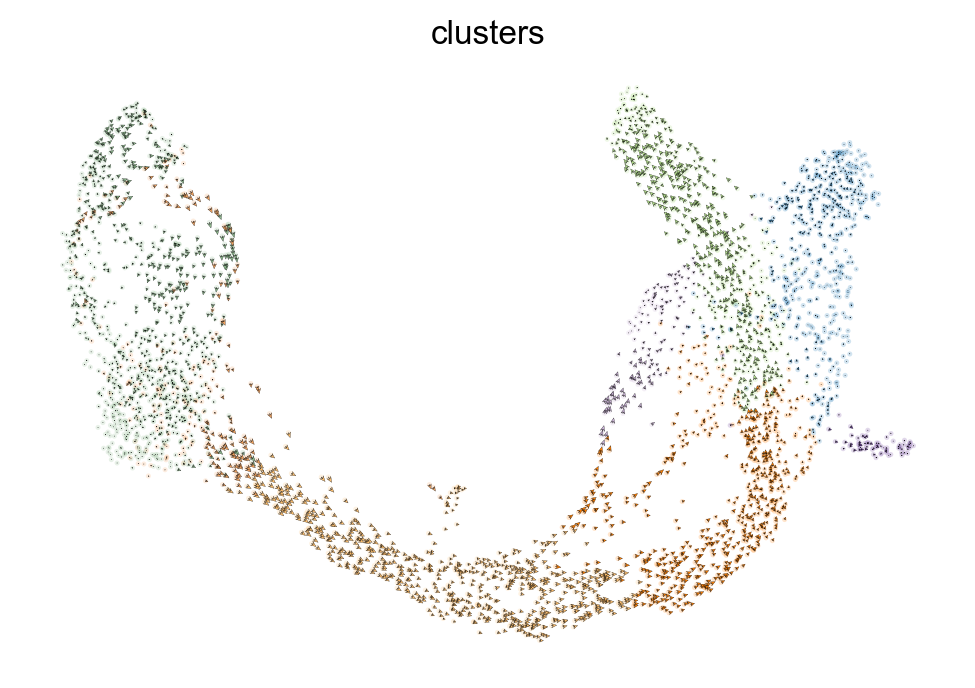

In [9]:
# 7.1 project velocities onto Umap embedding on cellular level.
scv.pl.velocity_embedding(adata, basis='umap')

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

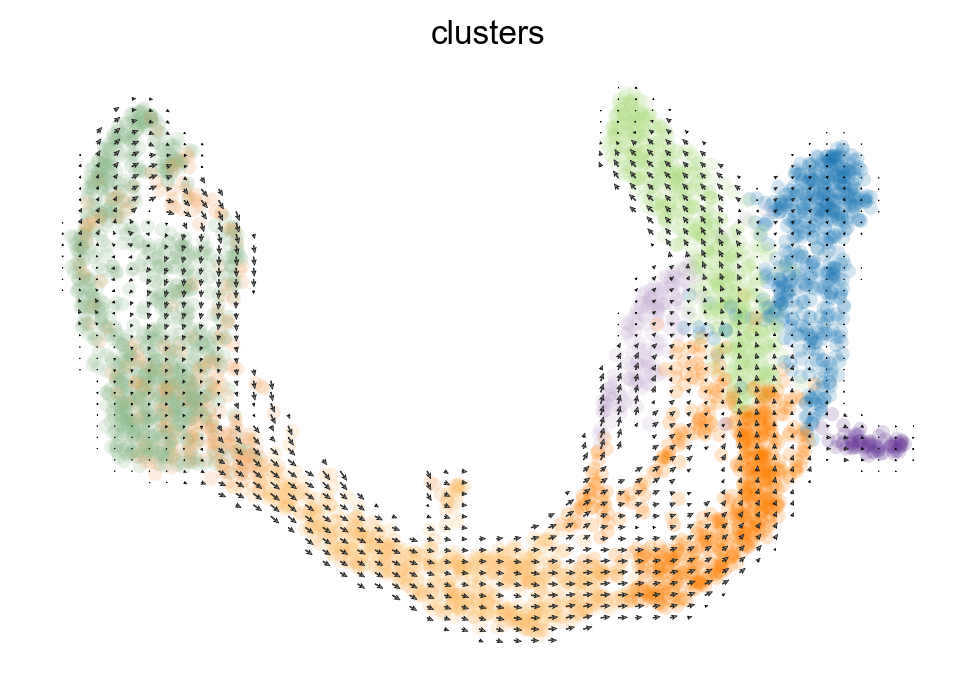

In [10]:
# 7.2 project velocities onto Umap embedding as gridlines.
scv.pl.velocity_embedding_grid(adata, basis='umap')

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

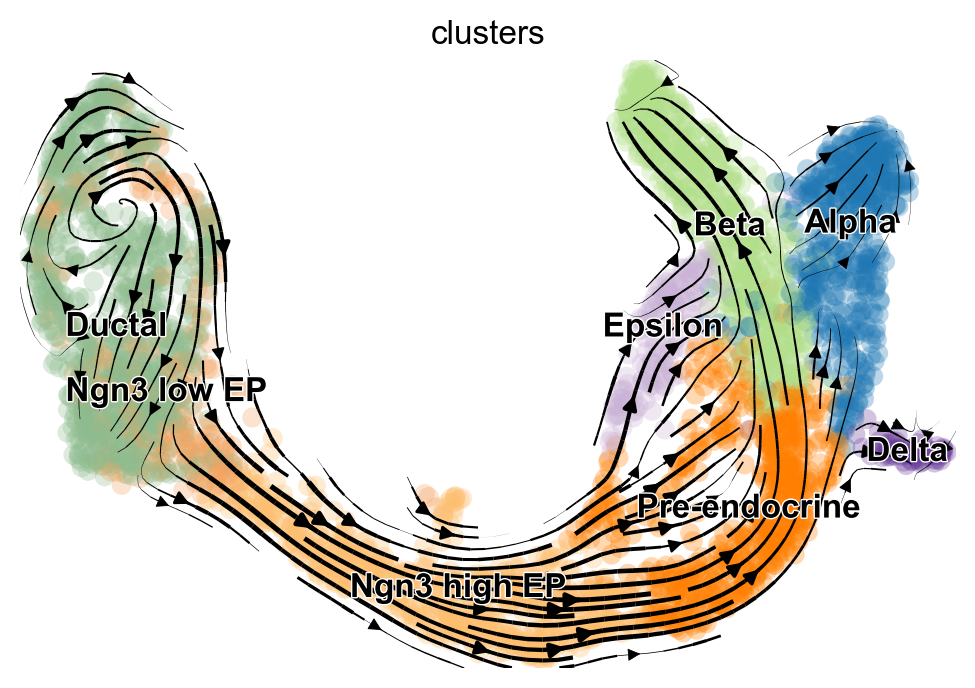

In [11]:
# 7.3 project velocities onto Umap embedding as streamlines.
scv.pl.velocity_embedding_stream(adata, basis='umap')

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

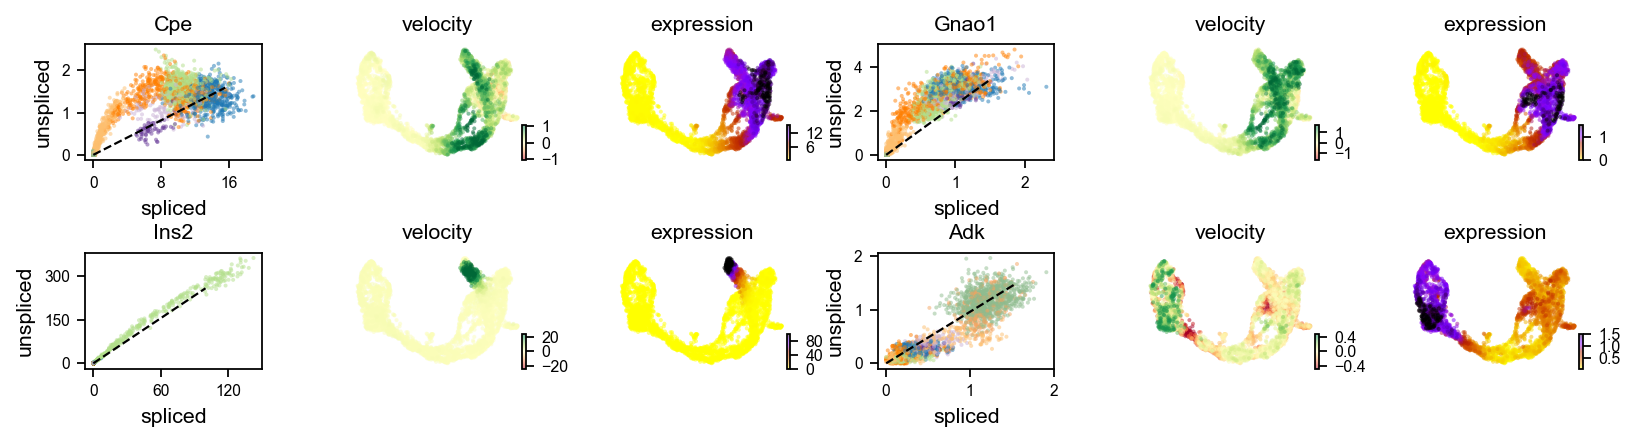

In [12]:
# 8.1 Visualize phase portraits of some marker genes,colored by cluster or velocity.
scv.pl.velocity(adata, ['Cpe',  'Gnao1', 'Ins2', 'Adk'], ncols=2)

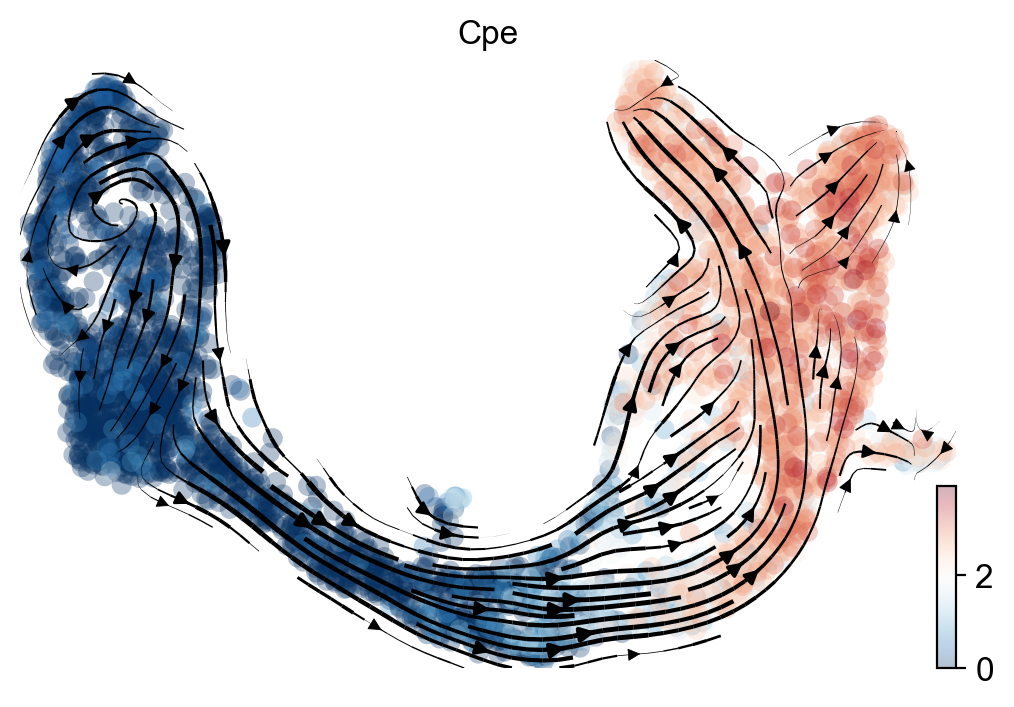

In [13]:
# 8.2 View the streamline direction of the gene on UMAP
scv.pl.velocity_embedding_stream(adata, basis='umap', color='Cpe')

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

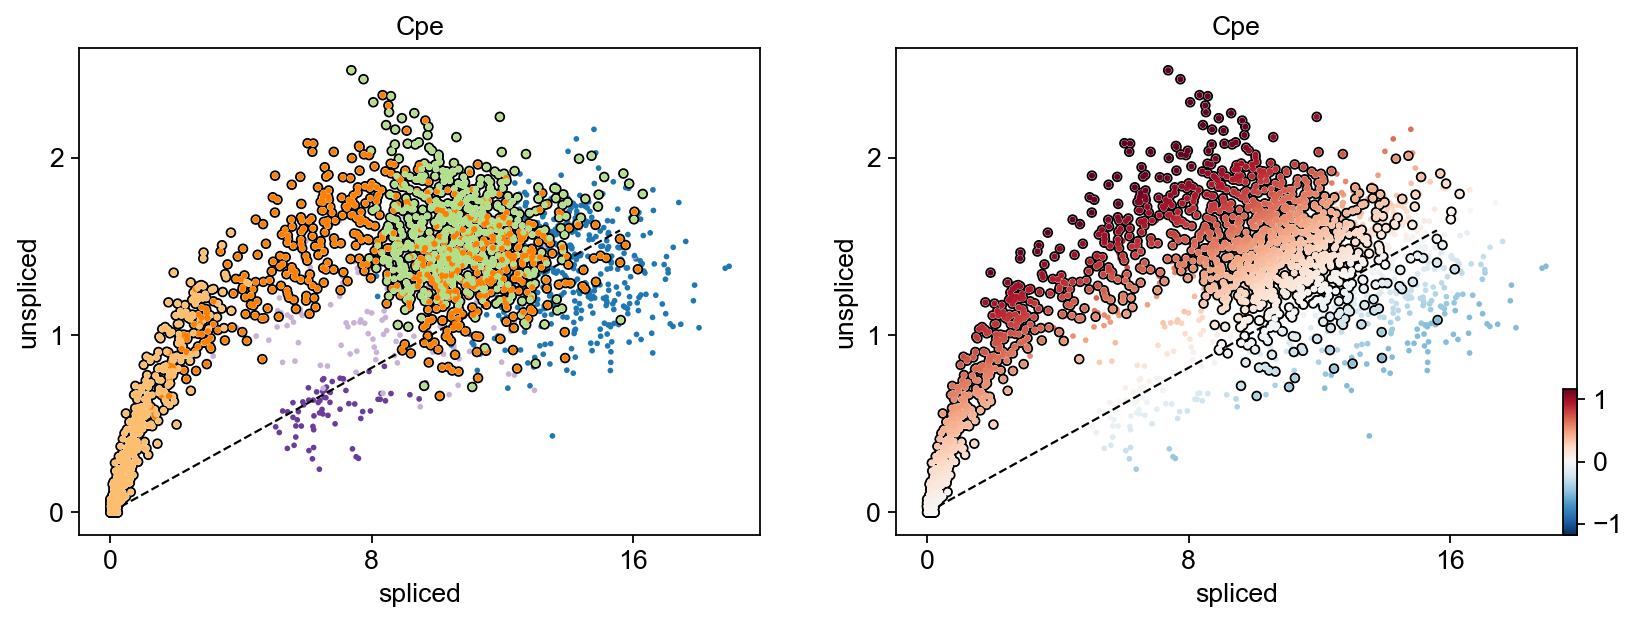

In [14]:
# 8.3 Phase portraits of marker genes， colored by cluster or velocity.
scv.pl.scatter(adata, 'Cpe', color=['clusters', 'velocity'],
               add_outline='Ngn3 high EP, Pre-endocrine, Beta')

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

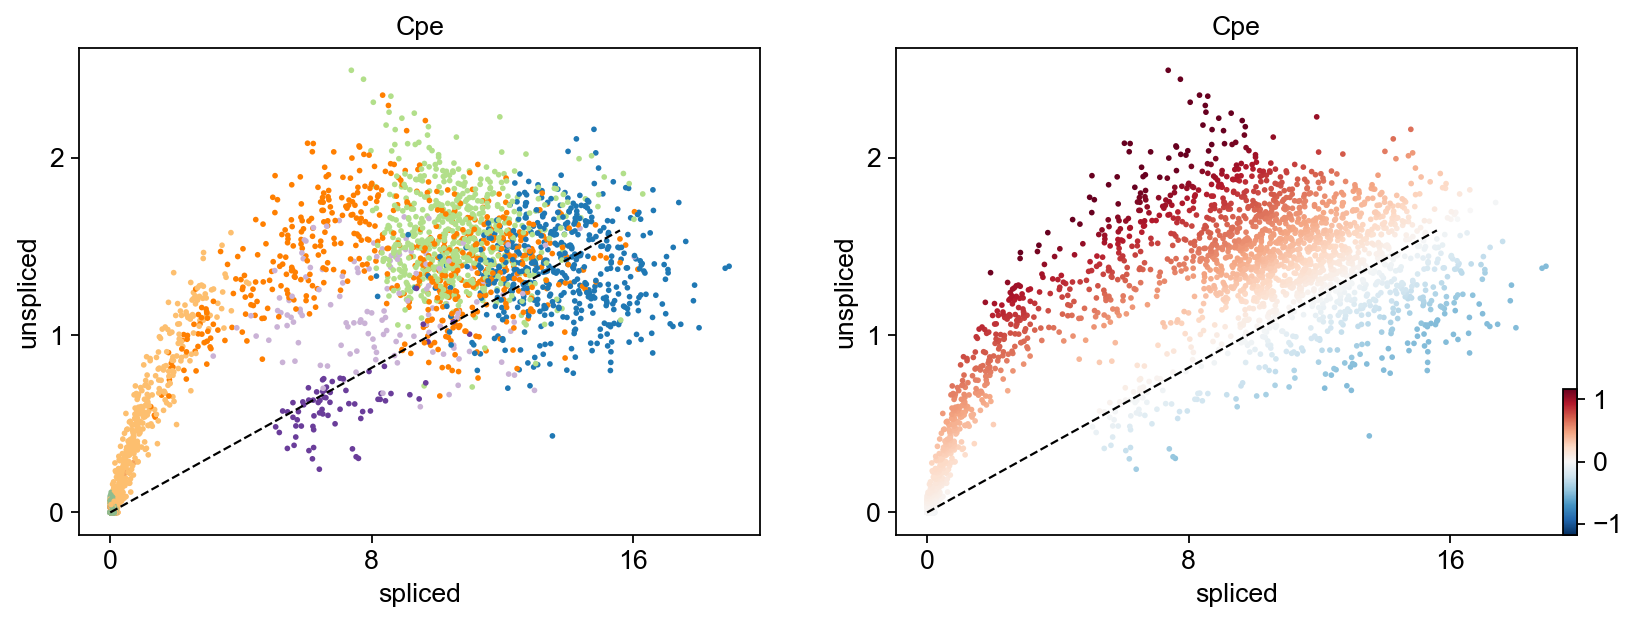

In [15]:
# 8.4 Phase portraits of marker genes， colored by cluster or velocity.
scv.pl.scatter(adata, 'Cpe', color=['clusters', 'velocity'])

In [16]:
# 9.1 Find gene with cluster-specific velocity by t-test
# The correlation between the gene's velocity vector and its fitting result in the phase portrait must be greater than 0.3.
scv.tl.rank_velocity_genes(adata, groupby='clusters', min_corr=.3)

import pandas as pd
df = pd.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

ranking velocity genes


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/tools/utils.py:463: DeprecationWarning: Please import `rankdata` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import rankdata


    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


Ductal Ngn3 low EP Ngn3 high EP Pre-endocrine     Beta    Alpha    Delta  \
0  Notch2       Ptpn3        Pde1c           Pam     Pax6  Zcchc16    Zdbf2   
1    Sox5       Hacd1        Ptprs          Sdk1    Unc5c    Nlgn1   Spock3   
2   Krt19       Hspa8         Pclo        Baiap3     Nnat    Nell1  Akr1c19   
3   Hspa8      Gm8113     Rap1gap2         Abcc8  Tmem108   Prune2    Ptprt   
4    Ano6       Kcnq1        Ttyh2          Gnas    Ptprt     Ksr2   Snap25   

  Epsilon  
0   Tmcc3  
1    Heg1  
2  Gpr179  
3    Ica1  
4   Ncoa7

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

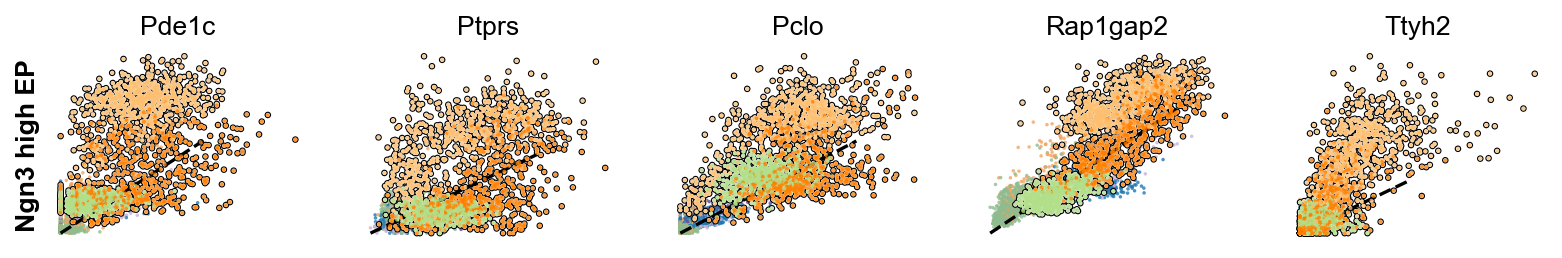

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

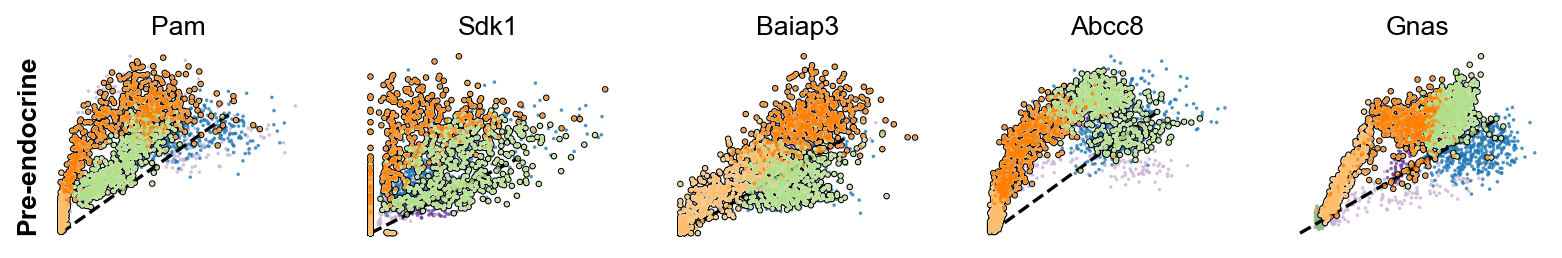

In [17]:
# 9.2 Batch visualization of phase portraits of important driver genes
kwargs = dict(frameon=False, size=10, linewidth=1.5,alpha=0.8,
              add_outline='Ngn3 high EP, Pre-endocrine, Beta')

scv.pl.scatter(adata, df['Ngn3 high EP'][:5], ylabel='Ngn3 high EP', **kwargs)
scv.pl.scatter(adata, df['Pre-endocrine'][:5], ylabel='Pre-endocrine', **kwargs)

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

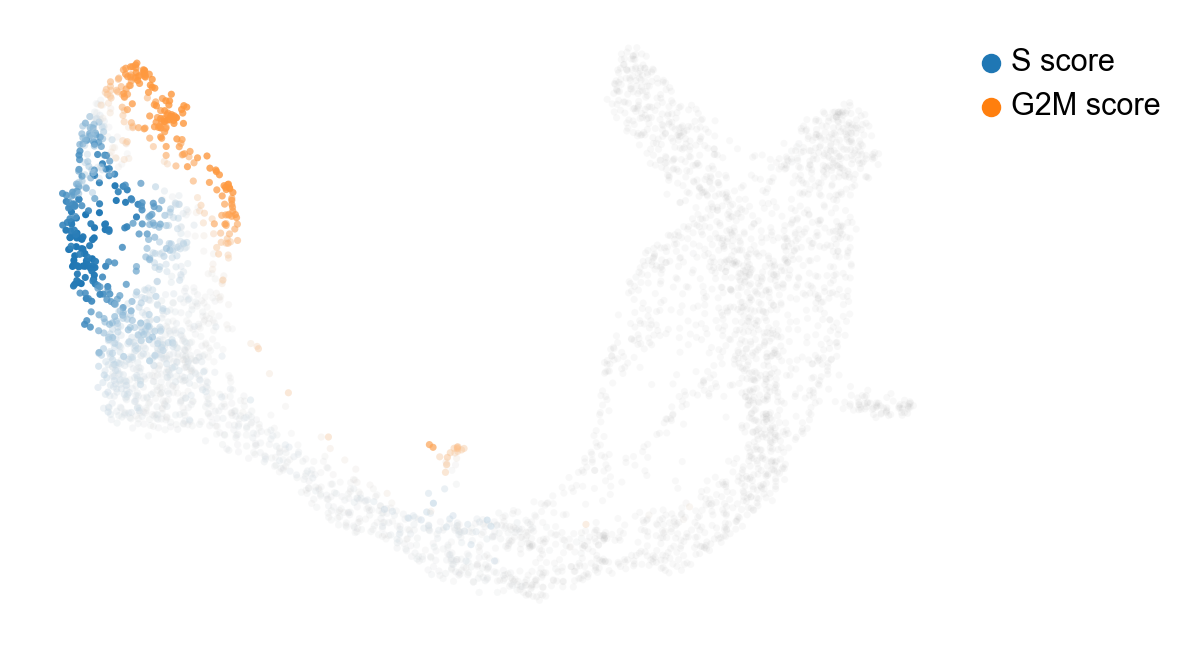

In [18]:
# 10.1 Calculate cell cycles
scv.tl.score_genes_cell_cycle(adata)
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])

/var/folders/hc/vh9fj9s97ds8lwjpw_6l74p80000gn/T/ipykernel_96366/1830923232.py:5: DeprecationWarning: `get_df` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please `AnnData::get_df` or Scanpy's `scanpy.get.obs_df` or `scanpy.get.var_df`.
  s_genes = scv.get_df(adata[:, s_genes], 'spearmans_score', sort_values=True).index
/var/folders/hc/vh9fj9s97ds8lwjpw_6l74p80000gn/T/ipykernel_96366/1830923232.py:6: DeprecationWarning: `get_df` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please `AnnData::get_df` or Scanpy's `scanpy.get.obs_df` or `scanpy.get.var_df`.
  g2m_genes = scv.get_df(adata[:, g2m_genes], 'spearmans_score', sort_values=True).index
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance

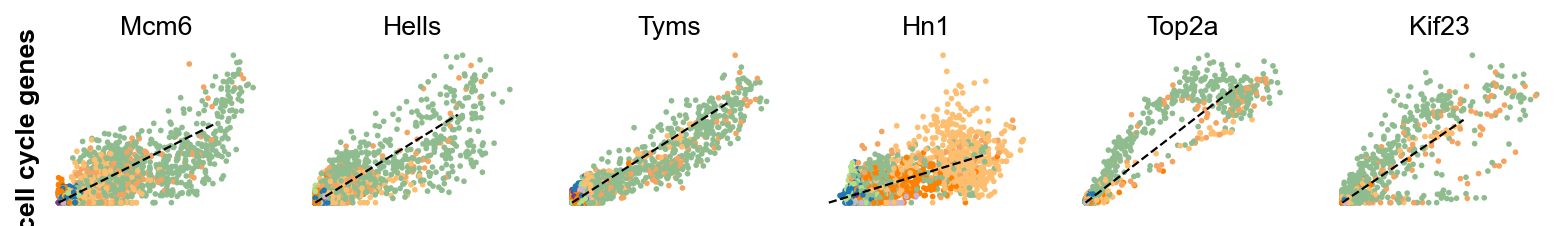

In [19]:
# 10.2 Extract a predefined list of cell cycle genes
s_genes, g2m_genes = scv.utils.get_phase_marker_genes(adata)

# Sort genes by spearman score and find genes with velocity arcs.
s_genes = scv.get_df(adata[:, s_genes], 'spearmans_score', sort_values=True).index
g2m_genes = scv.get_df(adata[:, g2m_genes], 'spearmans_score', sort_values=True).index

# Visualize phase portraits of seelected genes
kwargs = dict(frameon=False, ylabel='cell cycle genes')
scv.pl.scatter(adata, list(s_genes[:3]) + list(g2m_genes[:3]), **kwargs)

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

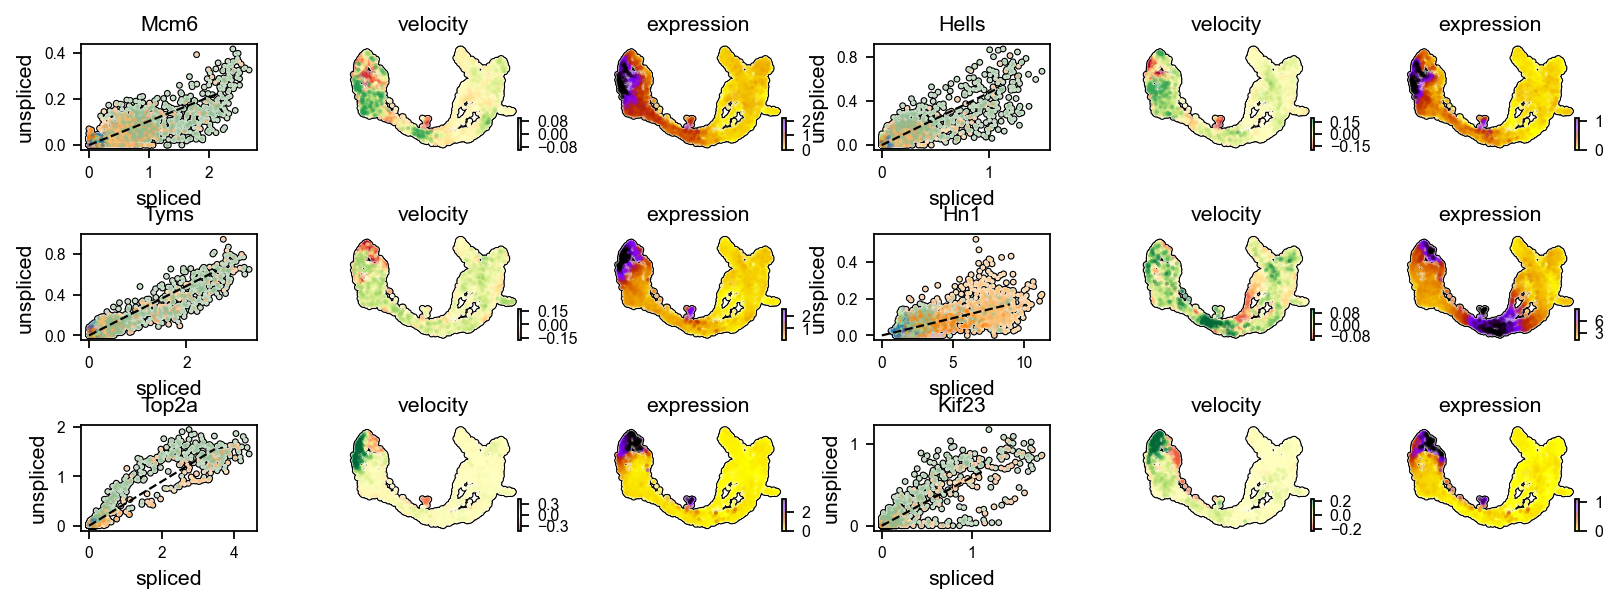

In [20]:
# 10.3 Visualize phase portraits and velocity on the Umap of seelected genes
scv.pl.velocity(adata, ['Mcm6','Hells', 'Tyms','Hn1', 'Top2a', 'Kif23'], ncols=2, add_outline=True)

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

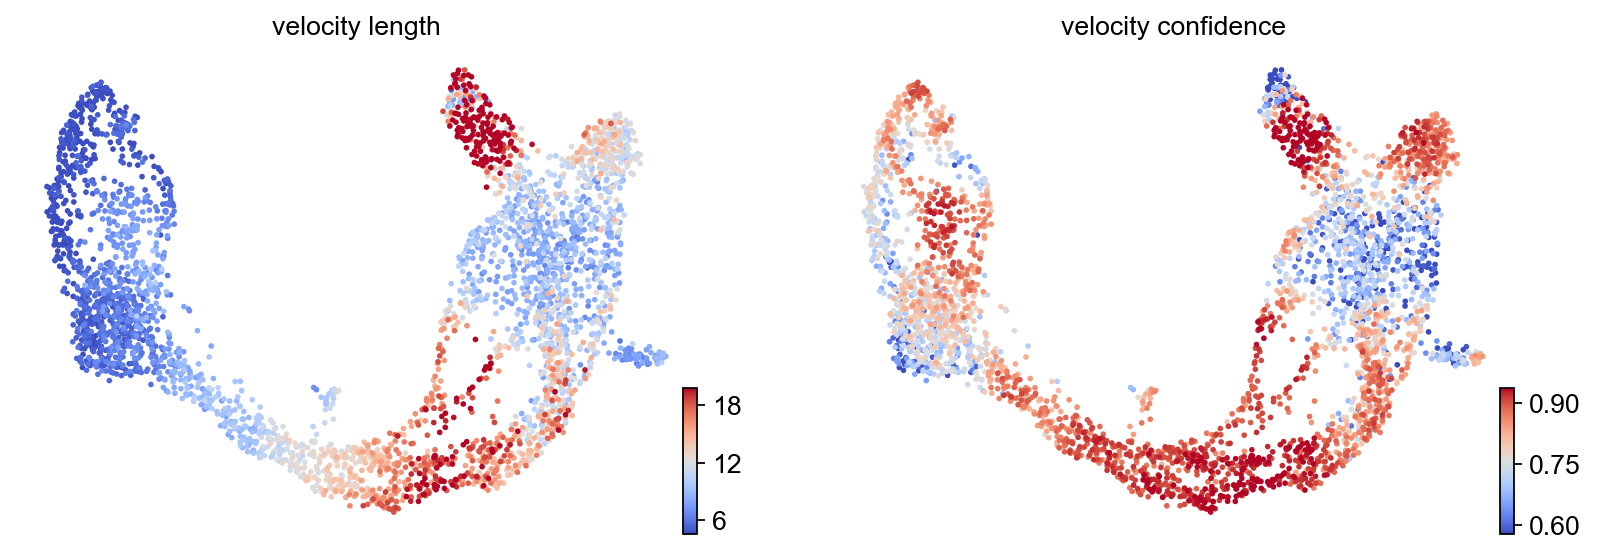

In [21]:
# 11.1 Velocity_length & Velocity_confidence (cell level)
# Velocity_length (speed of differentiation) : the total length of the RNA velocity vector of all genes in a cell
# Velocity_confidence (confidence of differentiation）：The cosine distance velocity between one cell and its nearest neighbors.

scv.tl.velocity_confidence(adata)

# Visualize Velocity_length and Velocity_confidence on Umap;

keys = ['velocity_length', 'velocity_confidence']
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

# Visualize Velocity_length and Velocity_confidence on heatmap table;

df = adata.obs.groupby('clusters')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

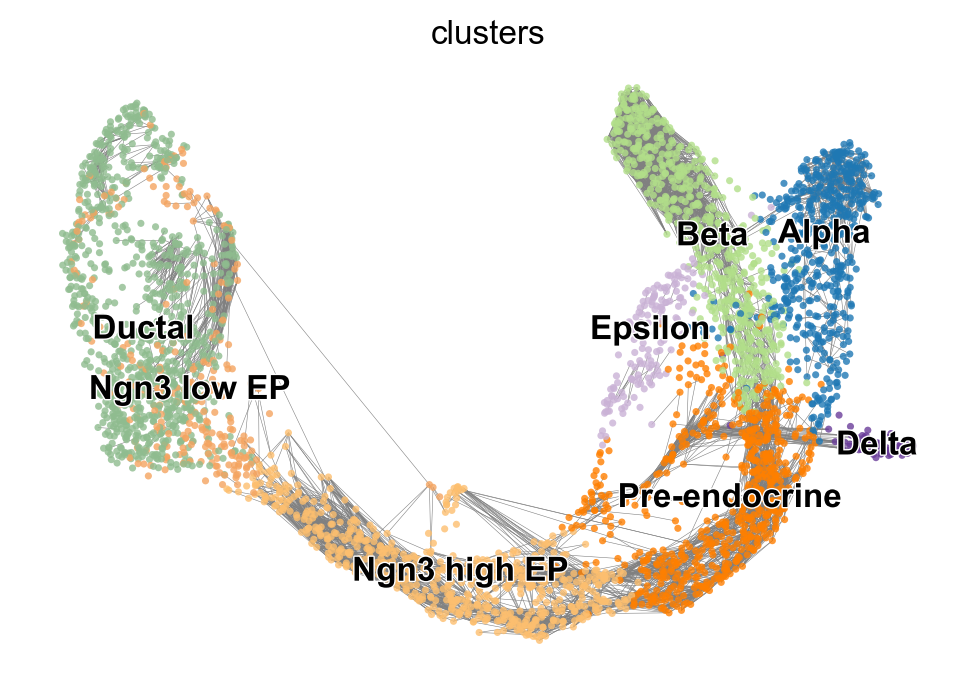

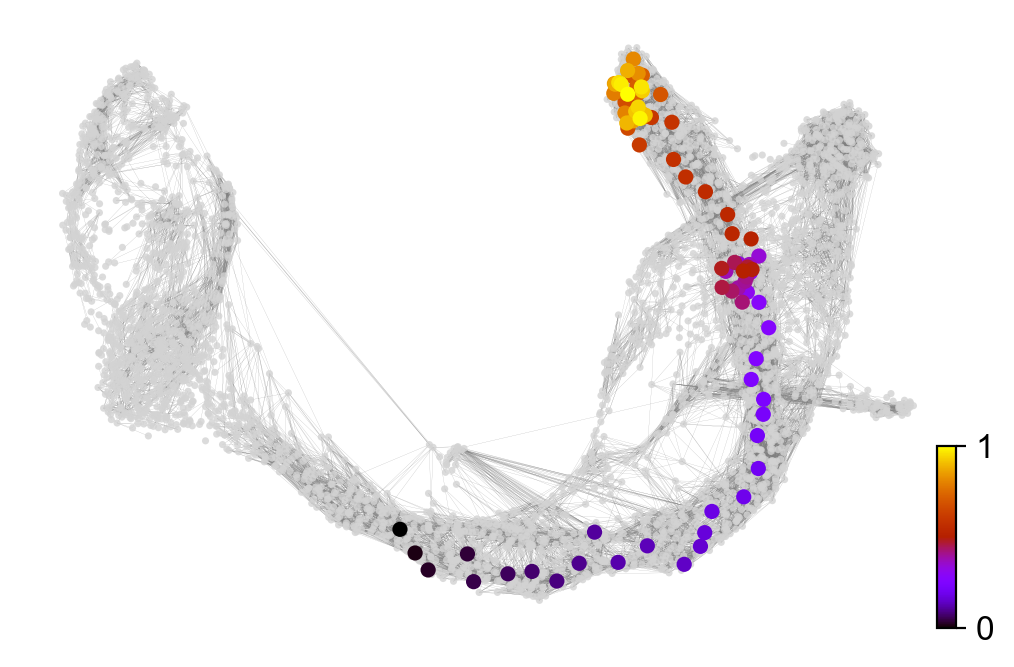

/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

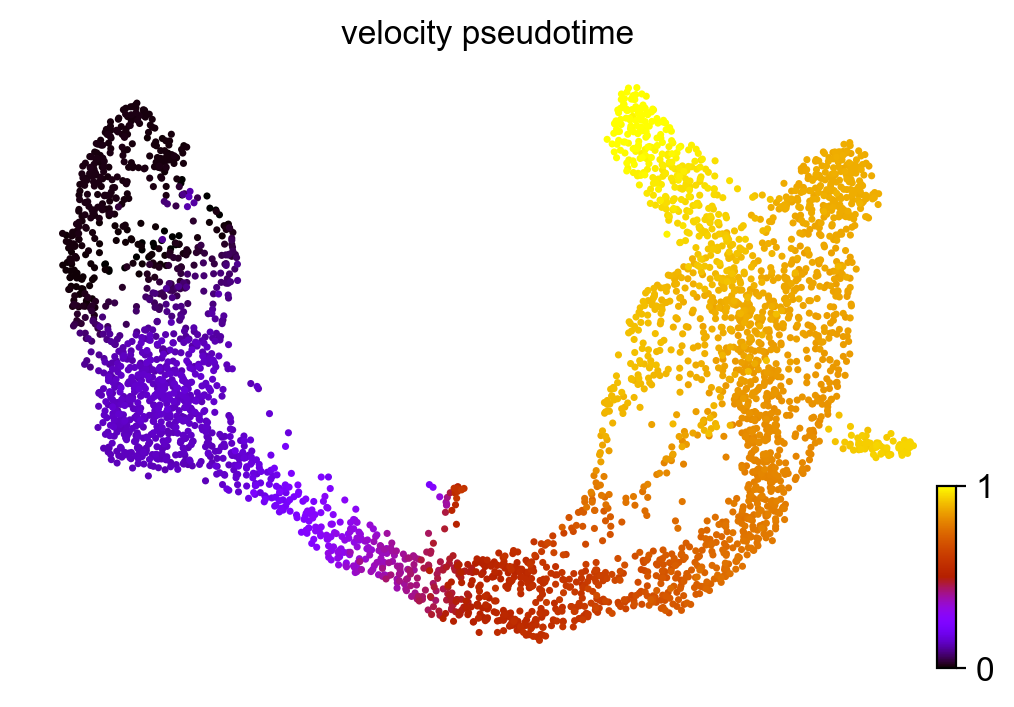

In [28]:
# 11.2 global trajectories (cell level)
# Using intercellular transitions to construct global developmental trajectories and timelines.

# Viscualize the transitions (cosine Similarity > 0.1)

scv.pl.velocity_graph(adata, threshold=.1)

# Developmental trajectory tracking

x, y = scv.utils.get_cell_transitions(adata, basis='umap', starting_cell=70)
ax = scv.pl.velocity_graph(adata, c='lightgrey', edge_width=.05, show=False)
ax = scv.pl.scatter(adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax)

# Developmental pseudotime

scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

In [31]:
# 12.1 global trajectories (cluster level)
# Extend PAGA by velocity-inferred directionality.

# Install or upgrade igraph. (PAGA requires to install igraph)，(Note version compatibility).
# !pip install "igraph==0.11.9"

# this is needed due to a current bug - bugfix is coming soon.
adata.uns['neighbors'] = {
    'distances': adata.obsp['distances'], 
    'connectivities': adata.obsp['connectivities']
}
print(adata.uns['neighbors'].keys())

# calculate the direction of cluster
scv.tl.paga(adata, groups='clusters')

dict_keys(['distances', 'connectivities'])
running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


In [32]:
# 12.2 Visulize the direction of cluters on heatmap table
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

/var/folders/hc/vh9fj9s97ds8lwjpw_6l74p80000gn/T/ipykernel_96366/3617967712.py:2: DeprecationWarning: `get_df` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please `AnnData::get_df` or Scanpy's `scanpy.get.obs_df` or `scanpy.get.var_df`.
  df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/core/_anndata.py:257: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(data.obs[key])


/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/Ubin/miniforge3/envs/velo_env/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/lixia/Data/U

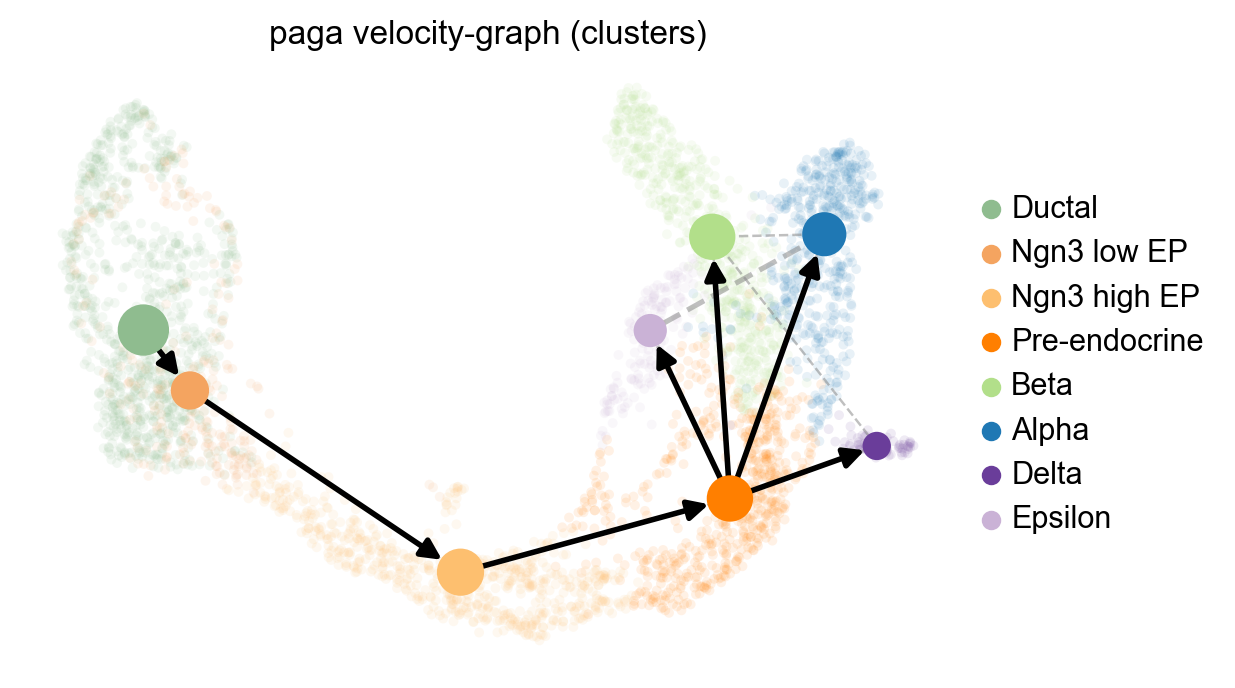

In [33]:
# 12.3 Visulize the direction of cluters on Umap
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)